<a href="https://colab.research.google.com/github/mardimzon/EMTECH/blob/main/Prelim_Examination_CPE019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Data Analysis
2nd Semester | AY 2023-2024
<hr> | <hr>
<u></u>
**Name** | Dimzon, Mark Allen Rhoy
          |  Darroca , Josiah
**Section** | CPE32S5
**Date Performed**: | March 10, 2024
**Date Submitted**: | March 10, 2024
**Instructor**: | Engr. Roman Richards

<hr>

OBJECTIVES

Choose any dataset applicable for classification and/or prediction analysis problems.
Show the application of the following algorithms:

    Linear Regression
        Singular LR
        Multiple LR
        Polynomial LR
    Logistic Regression
    Decision Tree
    Random Forest



# **TOPIC : FUEL CONSUMPTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

LINEAR REGRESSION MODELS




In [ ]:
#SINGULAR LINEAR REGRESSION

import pandas as pd

file_path = 'FuelCon.csv'
FuelCon = pd.read_csv(file_path)

print("Fuel Consumption: ")
FuelCon.head(20)

Fuel Consumption: 


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
5,2022,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29,231,5,7
6,2022,Acura,TLX Type S,Compact,3.0,6,AS10,Z,12.3,9.4,11.0,26,256,5,5
7,2022,Acura,TLX Type S (Performance Tire),Compact,3.0,6,AS10,Z,12.3,9.8,11.2,25,261,4,5
8,2022,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,32,205,6,3
9,2022,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,31,217,5,3


In [ ]:
FuelCon_df=pd.DataFrame(FuelCon)
FuelCon_df=FuelCon_df.dropna()
FuelCon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [ ]:

unique_makes = FuelCon_df["Make"].unique()

print("Unique Makes:")
for make in unique_makes:
    print("- " + make)


Unique Makes:
- Acura
- Alfa Romeo
- Aston Martin
- Audi
- Bentley
- BMW
- Bugatti
- Buick
- Cadillac
- Chevrolet
- Chrysler
- Dodge
- FIAT
- Ford
- Genesis
- GMC
- Honda
- Hyundai
- Infiniti
- Jaguar
- Jeep
- Kia
- Lamborghini
- Land Rover
- Lexus
- Lincoln
- Maserati
- Mazda
- Mercedes-Benz
- MINI
- Mitsubishi
- Nissan
- Porsche
- Ram
- Rolls-Royce
- Subaru
- Toyota
- Volkswagen
- Volvo


In [ ]:
FuelCon_df.corr()

<ipython-input-86-725508063c2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  FuelCon_df.corr()


,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),NaN,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,NaN,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),NaN,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),NaN,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),NaN,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),NaN,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),NaN,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,NaN,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,NaN,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


<Axes: xlabel='Fuel Consumption (City (L/100 km)', ylabel='Fuel Consumption(Hwy (L/100 km))'>

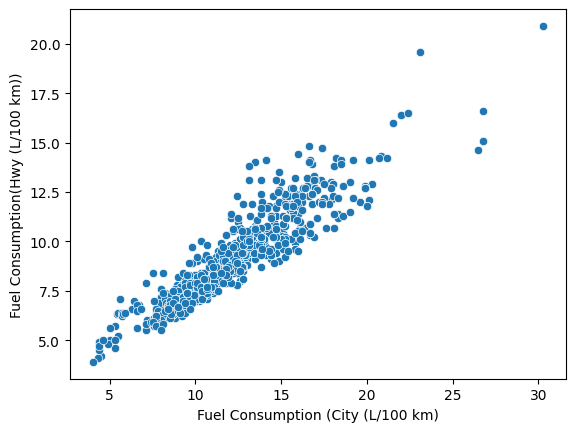

In [ ]:
sns.scatterplot(x="Fuel Consumption (City (L/100 km)", y="Fuel Consumption(Hwy (L/100 km))", data=FuelCon_df)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

fuel_df = pd.read_csv('FuelCon.csv')

X = np.array(fuel_df['Fuel Consumption (City (L/100 km)']).reshape(-1, 1)
y = np.array(fuel_df['Fuel Consumption(Hwy (L/100 km))']).reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

linear = LinearRegression()

linear.fit(X_train, y_train)


LinearRegression()

In [ ]:
fuel_df = pd.read_csv('FuelCon.csv')


X = fuel_df[['Fuel Consumption (City (L/100 km)']]
y = fuel_df['Fuel Consumption(Hwy (L/100 km))']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

pred_test = linear_reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, pred_test)
print("Mean Absolute Error (MAE):", round(mae, 2))

r2_score = metrics.r2_score(y_test, pred_test)
print("R-squared Score (R2 score):", round(r2_score, 2))


Mean Absolute Error (MAE): 0.64
R-squared Score (R2 score): 0.84


In [ ]:
actual_city = y_test.to_numpy()
predicted_city = pred_test

dframe_city = pd.DataFrame({'Actual_City': actual_city, 'Predicted_City': predicted_city})

print("City Fuel Consumption:")
dframe_city.head(25)

City Fuel Consumption:


,Actual_City,Predicted_City
0,12.7,11.705700
1,12.1,14.042426
2,11.8,11.398237
3,10.1,10.291367
4,9.0,9.184497
5,9.0,7.893149
6,8.9,8.385091
7,13.1,12.074657
8,8.4,8.016134
9,9.6,10.229874


In [ ]:
actual_hwy = y_test.to_numpy()
predicted_hwy = pred_test

dframe_hwy = pd.DataFrame({'Actual_Hwy': actual_hwy, 'Predicted_Hwy': predicted_hwy})

print("\nHighway Fuel Consumption:")
dframe_hwy.head(25)


Highway Fuel Consumption:


,Actual_Hwy,Predicted_Hwy
0,12.7,11.705700
1,12.1,14.042426
2,11.8,11.398237
3,10.1,10.291367
4,9.0,9.184497
5,9.0,7.893149
6,8.9,8.385091
7,13.1,12.074657
8,8.4,8.016134
9,9.6,10.229874


# **MULTIPLE LINEAR REGRESSION**

In [ ]:
#MULTIPLE LINEAR REGRESSION

x=FuelCon.drop(columns="Fuel Consumption(Hwy (L/100 km))")
y=FuelCon_df["Fuel Consumption(Hwy (L/100 km))"]


In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

linear = LinearRegression()


linear.fit(X_train, y_train)

y_pred_test = linear.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)

print("Mean Absolute Error =", round(mae, 2))
print("R2 Score =", round(r2, 2))



Mean Absolute Error = 4637469.31
R2 Score = -958919758430.66


Text(0.5, 1.0, 'Distribution of Errors')

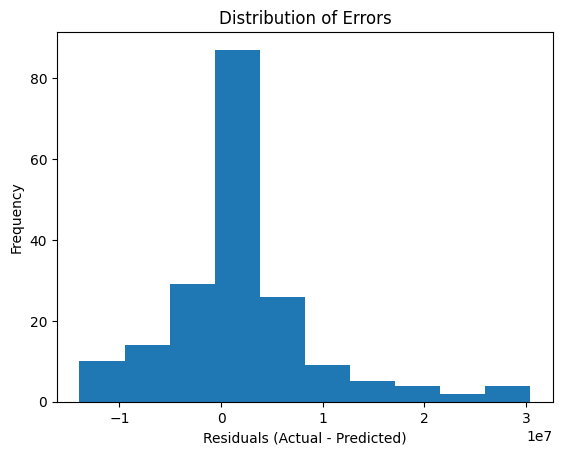

In [ ]:
plt.hist(y_test-y_pred_test)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Errors")

In [ ]:
y_train_pred=linear.predict(X_train)

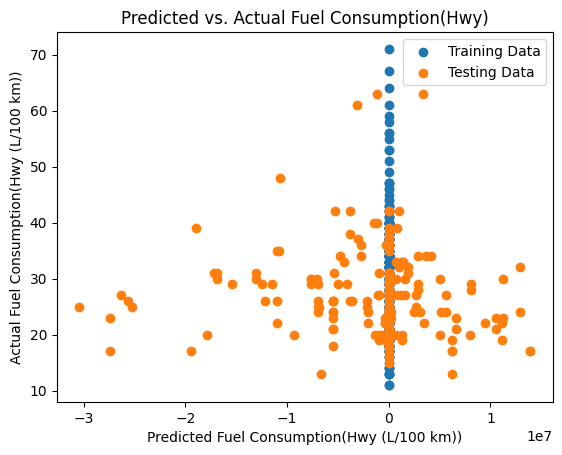

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_train_pred, y_train, label="Training Data")

plt.scatter(y_pred_test, y_test, label="Testing Data")

plt.xlabel("Predicted Fuel Consumption(Hwy (L/100 km))")
plt.ylabel("Actual Fuel Consumption(Hwy (L/100 km))")
plt.title("Predicted vs. Actual Fuel Consumption(Hwy)")

plt.legend()
plt.show()


# **POLYNOMIAL REGRESSION**

In [ ]:
import pandas as pd

file_path = 'FuelCon.csv'
FuelCon = pd.read_csv(file_path)

print("Fuel Consumption: ")
FuelCon.head(20)

Fuel Consumption: 


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
5,2022,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29,231,5,7
6,2022,Acura,TLX Type S,Compact,3.0,6,AS10,Z,12.3,9.4,11.0,26,256,5,5
7,2022,Acura,TLX Type S (Performance Tire),Compact,3.0,6,AS10,Z,12.3,9.8,11.2,25,261,4,5
8,2022,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,32,205,6,3
9,2022,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,31,217,5,3


In [ ]:
fuelcon_df=pd.DataFrame(FuelCon)

In [ ]:
fuelcon_df.corr()

<ipython-input-119-7fc6fbfd48f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fuelcon_df.corr()


,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),NaN,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,NaN,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),NaN,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),NaN,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),NaN,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),NaN,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),NaN,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,NaN,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,NaN,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


In [ ]:
fuelcon_df.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [ ]:
fuelcon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [ ]:
X=np.array(house_df["CO2 Rating"]).reshape(-1,1)
Y=np.array(house_df["Smog Rating"]).reshape(-1,1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [ ]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X_train)
model=linear.fit(X_poly,y_train)
X_test_poly = poly.transform(X_test)

y_pred=linear.predict(X_test_poly)

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 1.17
R2 score = 0.25


In [ ]:
coef=np.array(model.coef_).reshape(-1,1)
intercept=np.array(model.intercept_)

In [ ]:
print(coef)

[[ 0.        ]
 [ 0.81184628]
 [-0.02645959]]


In [ ]:
print(intercept)

[1.93345925]


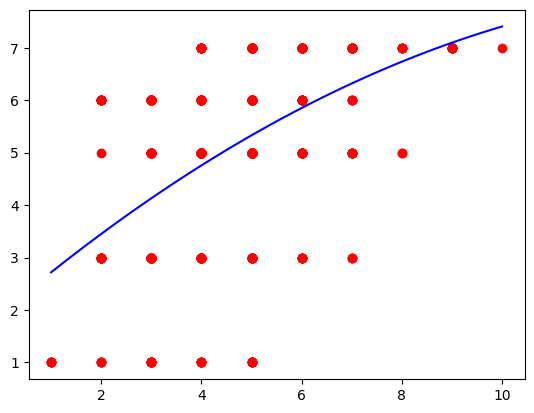

In [ ]:
x_axis=np.linspace(X_train.min(), X_train.max(), 50)
response= intercept+coef[1]* x_axis+coef[2]* x_axis**2
plt.scatter(X_train,y_train,color='r')
plt.plot(x_axis,response,color='b')
plt.show()

# **LOGISTIC REGRESSION**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd

file_path = 'FuelCon.csv'
FuelCon = pd.read_csv(file_path)

print("Fuel Consumption: ")
FuelCon.info(20)

Fuel Consumption: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 

In [ ]:
FuelCon.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [ ]:
X = FuelCon[['Cylinders', 'Engine Size(L)']]
y = FuelCon['CO2 Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

x_test_scaled = scaler.transform(X_test)

In [ ]:
LogReg = LogisticRegression()

In [ ]:
LogReg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = LogReg.predict(x_test_scaled)

In [ ]:
print("Confusion Matrix:")
print(sm.confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(sm.classification_report(y_test, y_pred))

Confusion Matrix:
[[ 0  1  0  0  0  0  0  0  0]
 [ 0  4  6  1  0  0  0  0  0]
 [ 0  0 27 10  2  0  0  0  0]
 [ 0  0  7 30  5  0  0  0  0]
 [ 0  0  0 19 36  0  1  0  0]
 [ 0  0  0  2 18  0  3  0  0]
 [ 0  0  0  0 13  1  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.80      0.36      0.50        11
           3       0.68      0.69      0.68        39
           4       0.48      0.71      0.58        42
           5       0.46      0.64      0.54        56
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3

    accuracy                           0.51       190
   macro avg       0.27      0.27      0.26       190
weighted avg       0.43      0.51    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
LogR = LogisticRegression(C=20)

LogR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=20)

In [ ]:
train_LogR = LogR.score(X_train,y_train)
print(f"Accuracy: {train_LogR}")

Accuracy: 0.5291005291005291


In [ ]:
test_LogR = LogR.score(X_test,y_test)
print(f"Accuracy: {test_LogR}")

Accuracy: 0.5263157894736842


# **Decision Tree**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fc = pd.read_csv('FuelCon.csv')
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [ ]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


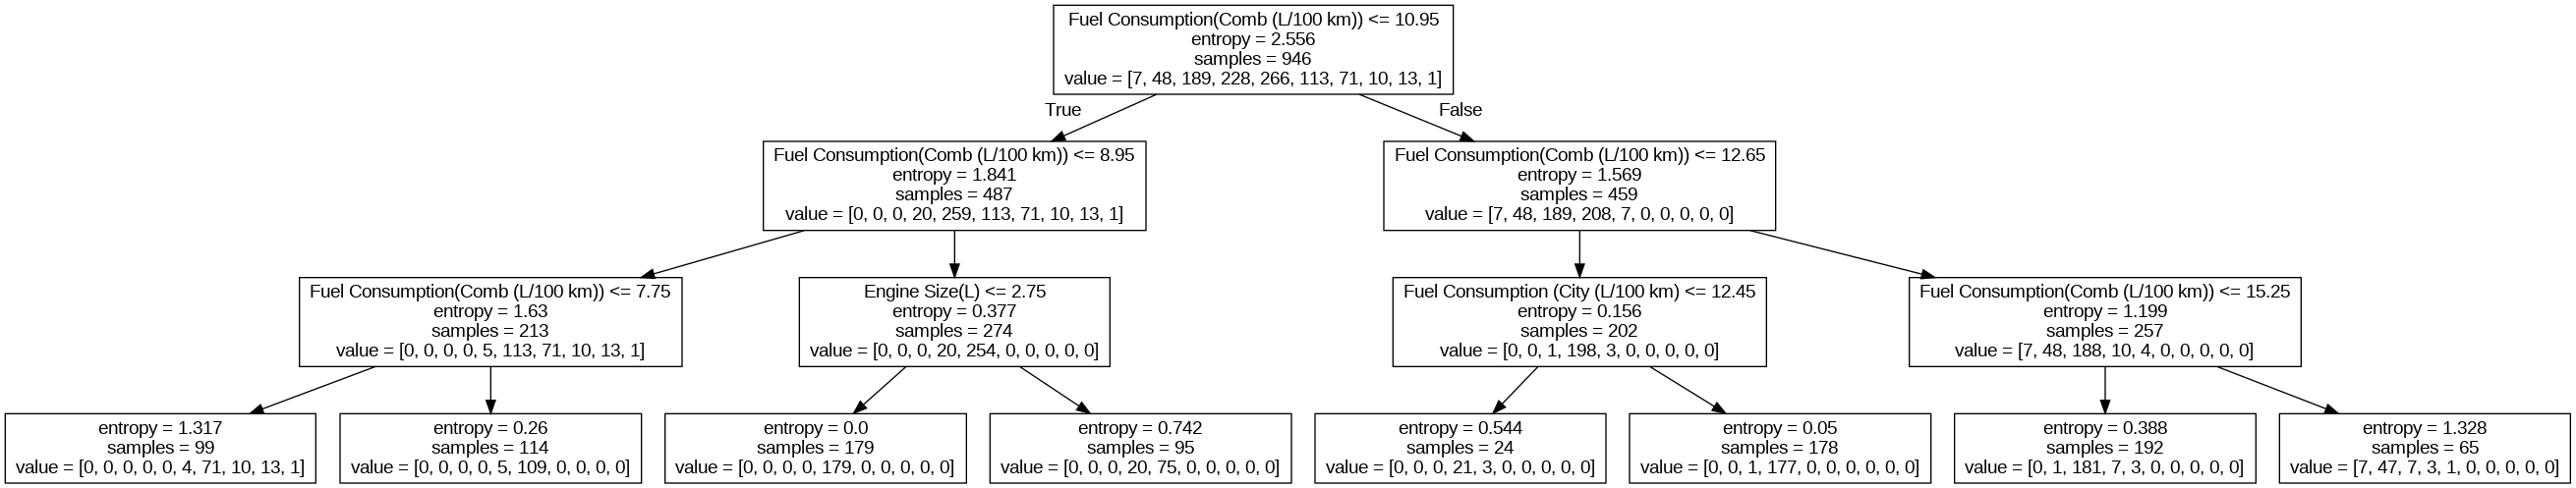

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image

y_target = fc["CO2 Rating"].values
columns = ["Fuel Consumption(Hwy (L/100 km))", "Fuel Consumption(Comb (L/100 km))", "Fuel Consumption(Comb (mpg))", "Engine Size(L)", "Fuel Consumption (City (L/100 km)"]

#create the variable to hold the features that the classifier will use
X_input = fc[list(columns)].values

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

clf_train.score(X_input,y_target)

dot_file_path = "FuelCon.dot"
with open(dot_file_path, 'w') as f:
  f = export_graphviz(clf_train, out_file=f, feature_names=columns)

!dot -Tpng ./FuelCon.dot -o ./FuelCon.png

Image(filename = "./FuelCon.png")

# **Random Forest**

In [ ]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Now we can use the encoded variable for modeling
X = fc[['CO2 Rating']]
y = fc['Vehicle Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Random Forest classifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.2736842105263158
Confusion Matrix:
 [[ 0  0  1  0  0  0  0 14  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  9  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  9 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 27  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 32  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  0  0  0  0  1]]
Classification Report:
                          precision    recall  f1-score   support

                Compact       0.00      0.00      0.00        17
              Full-size       0.00      0.00      0.00        14
               Mid-size       0.33      0.05      0.08        22
            Minicompact       0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


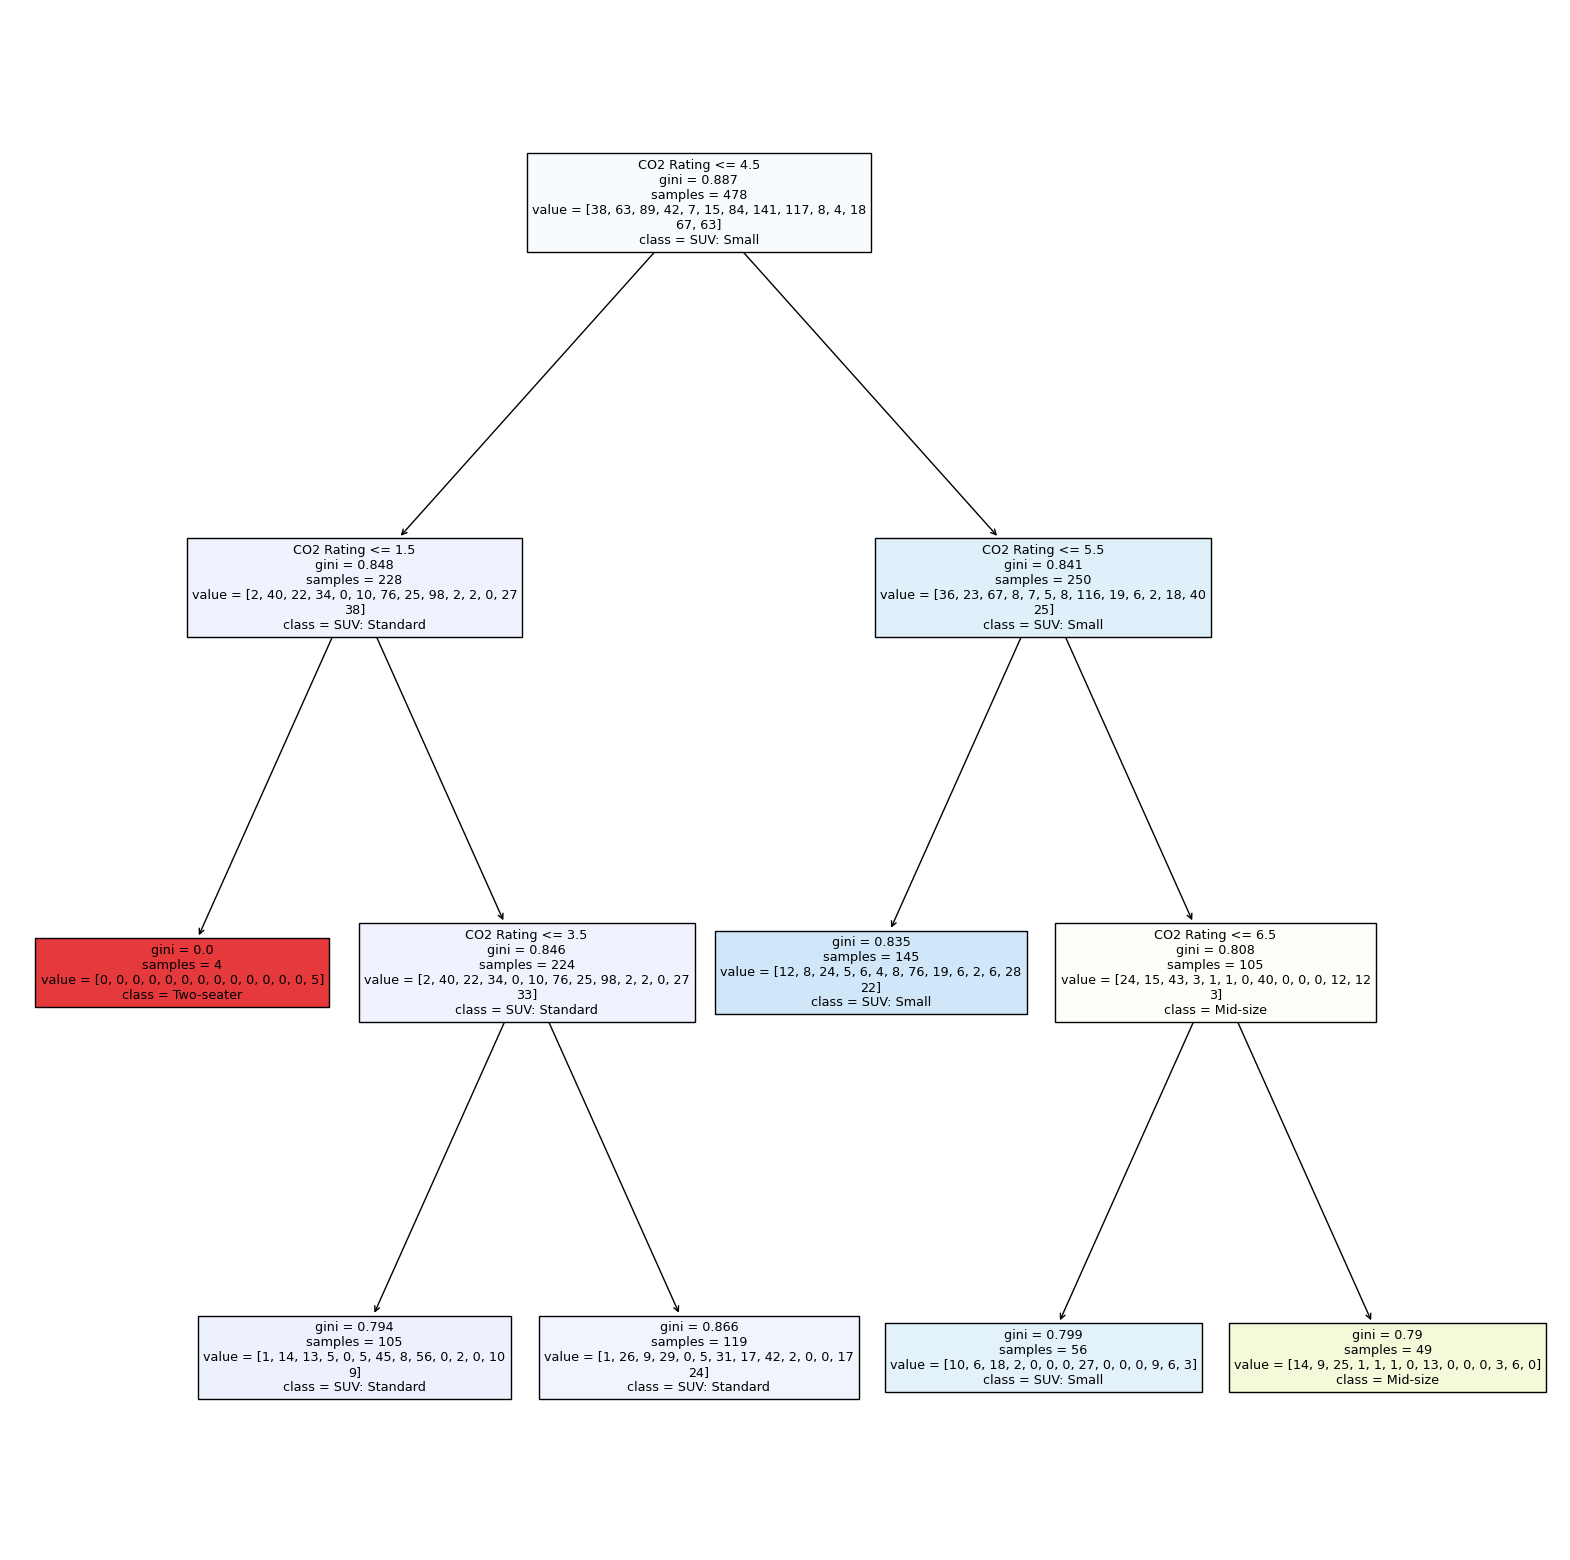

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(model_rf.estimators_[0], filled=True, feature_names=X.columns, class_names=model_rf.classes_)
plt.show()

# **Provide Evaluation reports for all models**


**Singular LR:** Mean Absolute Error (MAE): 0.64 ||
R-squared Score (R2 score): 0.84

**Multiple LR:** Mean Absolute Error = 4637469.31 || R2 Score = -958919758430.66

**Polynomial LR:** Accuracy: 0.5291005291005291 || Accuracy: 0.5263157894736842





>



**Decision Tree Evaluation**

Evaluation: This Decision Tree Classifier uses features related to Fuel Consumption of Comb in mpg and the Carbon Dioxied Ratings of vehicles.


---


The libraries that were used are:
- Pandas for reading the data inside the dataset
- sklearn for tree functions
- sklearn.tree in order to use the functions of graphviz
- IPython.display to display the png file of the results for the Decision Tree

The target variable which is denoted as `y_target` has the values of CO2 Ratings wwhicle `X_input` has the values of Fuel Consumption.

In regards to the model itself which is the Decision Tree Classifier which is the `clf_train` function, is under the parameters set by us in `(criterion="entropy", max_depth=3)`. In the process of training this data where the `fit()` function is used, the matrix featured the `X_input` and made `y_target` as the target variable.

The accuracy score when these two features of the dataset is trained using the `score()` fucntion.



---



*In regards to model training. the code has successfully trained the data to use a Decision Tree Classifier to predict the CO2 Rating based on the fuel consumption features.*


*The accuracy score of the trained model on the dataset is not printed, but its results are reflected in `clf_train.score(X_input, y_target).` This score shows how the model fits the data that is trained. However, it's necessary to evaluate the performance of the model on unseen data.*



*The code exports the decision tree visualization as a PNG image, making it easier to interpret the learned decision rules. Visualizing the decision tree helps understand how the model makes predictions based on the features.*





>









**Random Forest Evaluation**

Evaluation: In the output, you can see that the random forest classifier has built several decision trees, each with different threshold values and features. The final prediction is made by aggregating the predictions of all the decision trees in the random forest. The most common class among the predictions is taken as the final prediction.



>


# **SUMMARY**

- In Summary, we looked at four machine learning models: singular linear regression, multiple linear regression, polynomial linear regression, and logistic regression. Each model was assessed according to its prediction performance and classification accuracy. Singular and Multiple Linear Regression models demonstrated reasonable predictive ability, but Polynomial Regression increased performance marginally. Logistic Regression was highly accurate in classifying data. These findings highlight the necessity of choosing the right model for a certain task, taking into account both predictive and classification requirements.

# **CONCLUSION**

 In this activity, we applied various machine learning algorithms to predict fuel consumption and emissions. We found that linear regression provided insights into fuel efficiency,we learned the importance of selecting the right algorithm, engineering features, evaluating models, and using visualizations to interpret results.

# **LEARNINGS**

We noticed that different machine learning algorithms perform differently depending on the sort of problem we want to tackle. It is critical to understand each algorithm's strengths and shortcomings before selecting the one that best suits the task at hand. Furthermore, we learned the need of testing our models with proper metrics to guarantee they satisfy our performance requirements.